# Análise de Churn para Instituição Bancária com Modelagem Preditiva



## 1. Introdução

A rotatividade de clientes (churn) representa uma perda significativa de receita para instituições financeiras. Antecipar quais clientes estão propensos a encerrar suas contas permite a adoção de estratégias preventivas de retenção. Neste projeto tem como objetivo a criação de um modelo de machine learning para prever a probabilidade de um cliente cancelar sua conta em uma instituição bancária, fenômeno conhecido como churn. A análise se baseia em um conjunto de dados históricos de clientes, utilizando a metodologia SEMMA para estruturar o desenvolvimento do projeto, desde a amostragem dos dados até a avaliação e aplicação prática do modelo.

Link para o dataset kaggle:
Link para documento sobre o tema: https://docs.google.com/document/d/1goxUsertJAEc9pmrDlmoQX9_6Mfpx8mBZq7Onyy6Vgs/edit?usp=sharing


## 2. Desenvolvimento

O desenvolvimento do projeto segue um pipeline baseado na metodologia SEMMA (Sample, Explore, Modify, Model, Assess), que divide o processo de mineração de dados em etapas bem definidas.

Pipeline das Etapas (SEMMA):
1. Sample → Seleção e limpeza do conjunto de dados bruto.
2. Explore → Análise exploratória (EDA) para entender padrões, distribuição e correlação entre variáveis.
3. Modify → Engenharia de atributos, balanceamento de classes e preparação dos dados para os algoritmos.
4. Model → Treinamento de diferentes modelos de classificação e ajuste de hiperparâmetros.
5. Assess → Avaliação dos modelos, comparação de métricas e persistência do melhor candidato.

### 2.1 Sample


Nesta fase inicial, realizamos a coleta e o primeiro tratamento dos dados. O conjunto de dados históricos foi carregado, e colunas irrelevantes para a análise, como 

RowNumber, CustomerId e Surname, foram removidas para focar nas características que podem influenciar a decisão de um cliente de deixar o banco. 

**Features (Variáveis):**

- **RowNumber**: Número sequencial atribuído a cada linha do conjunto de dados.
- **CustomerId**: Identificador único para cada cliente.
- **Surname**: Sobrenome do cliente.
- **CreditScore**: Pontuação de crédito do cliente.
- **Geography**: Localização geográfica do cliente (por exemplo, país ou região).
- **Gender**: Gênero do cliente.
- **Age**: Idade do cliente.
- **Tenure**: Número de anos que o cliente está no banco.
- **Balance**: Saldo da conta do cliente.
- **NumOfProducts**: Quantidade de produtos bancários que o cliente possui.
- **HasCrCard**: Indica se o cliente possui cartão de crédito (binário: sim/não).
- **IsActiveMember**: Indica se o cliente é um membro ativo (binário: sim/não).
- **EstimatedSalary**: Salário estimado do cliente.
- **Exited**: Indica se o cliente saiu do banco (binário: sim/não).






Criação do Dataframe:

In [72]:

# Importações e configuração
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, roc_auc_score, f1_score,
                            recall_score, precision_score, confusion_matrix,
                            classification_report, RocCurveDisplay)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier
from xgboost import XGBClassifier
# from lightgbm import LGBMClassifier  # opcional

RANDOM_STATE = 42

In [73]:

# Criação do dataframe:
base_path = r"D:\UERJ\Programação e Códicos\Curso de Extensão de Ciência de Dados\Curso de Ciência de Dados - 25.1\Aula de revisão"
df = pd.read_csv(base_path + '\\Churn_Modelling.csv')

# Excluindo as colunas desnecesessárias:
df = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
# Renomeado colunas:
df = df.rename(columns = {
                            "IsActiveMember" : "ActiveMember",
                            "HasCrCard" : "Card",
                            "Exited" : "Churn",
})

# Primeiras 15 linhas:
df.head(15)




,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,Card,ActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


Informações gerais dos dados:

In [74]:

display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   Card             10000 non-null  int64  
 8   ActiveMember     10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Churn            10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


None

In [75]:

df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
Card               0
ActiveMember       0
EstimatedSalary    0
Churn              0
dtype: int64

Descrição dos dados:

In [76]:

display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
Card,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
ActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Churn,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


### 2.2 Explore (EDA)


A fase de exploração consiste em uma análise detalhada dos dados para identificar padrões, outliers e correlações entre as variáveis. Foram gerados gráficos para visualizar a distribuição das variáveis numéricas e categóricas.



In [77]:



# Ajustes visuais
sns.set_style('dark')
sns.set_palette('tab10')


Distribuições e outliers (Univariável)

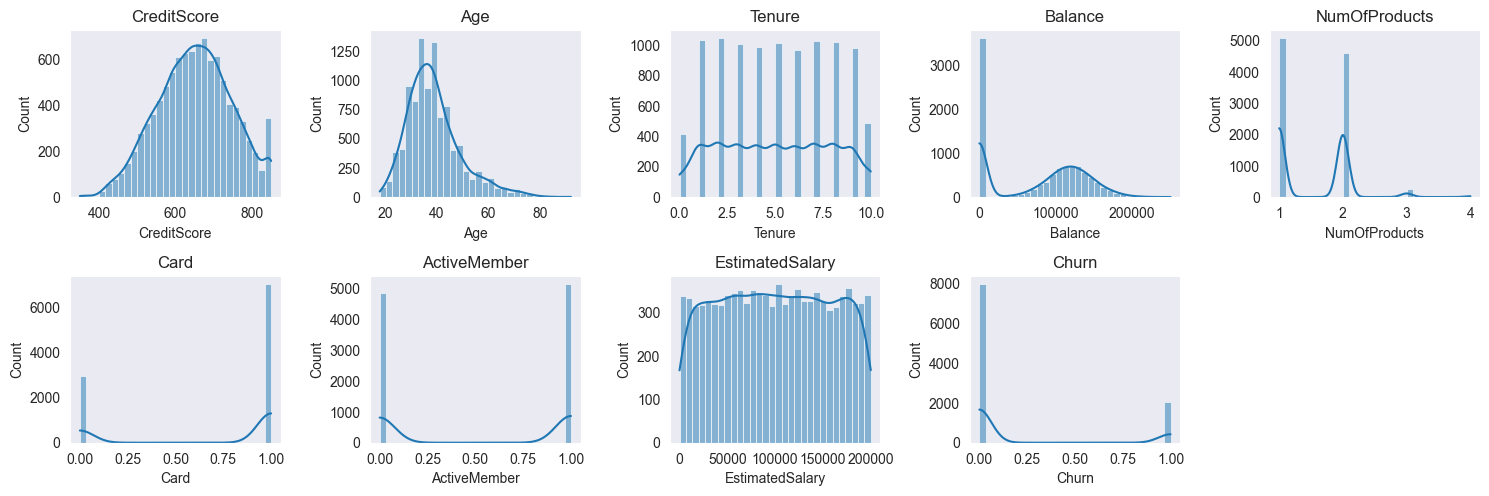

In [78]:

num_cols = df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 5, i)
    sns.histplot(df[col].dropna(), kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()




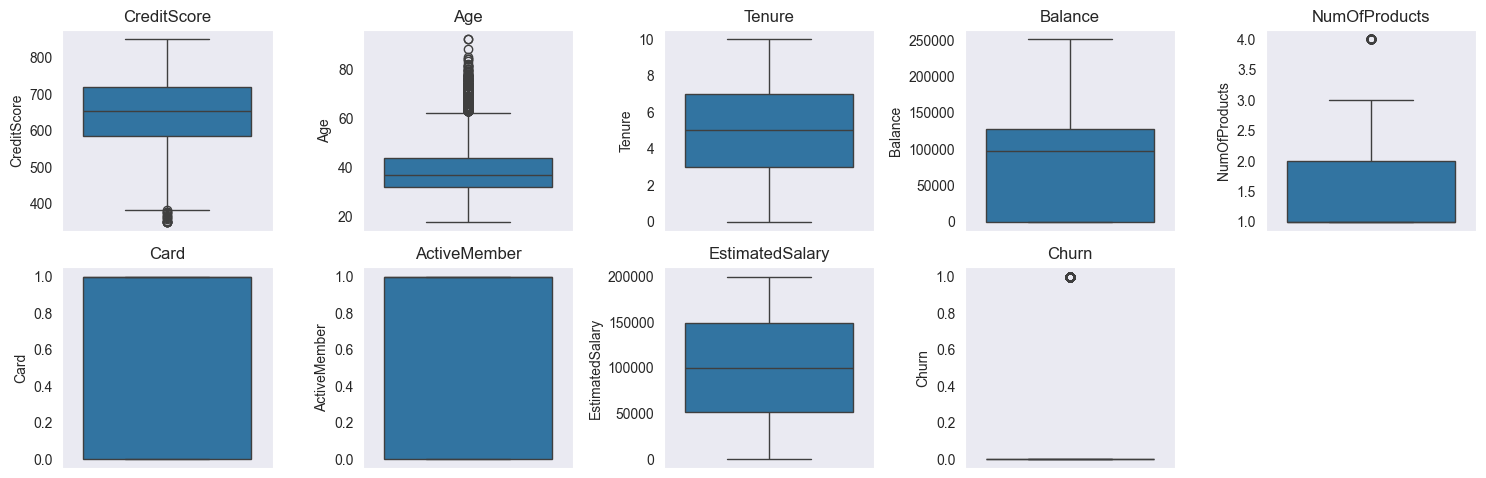

In [79]:

# Boxplots
plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 5, i)
    sns.boxplot(y=df[col].dropna())
    plt.title(col)
plt.tight_layout()
plt.show()

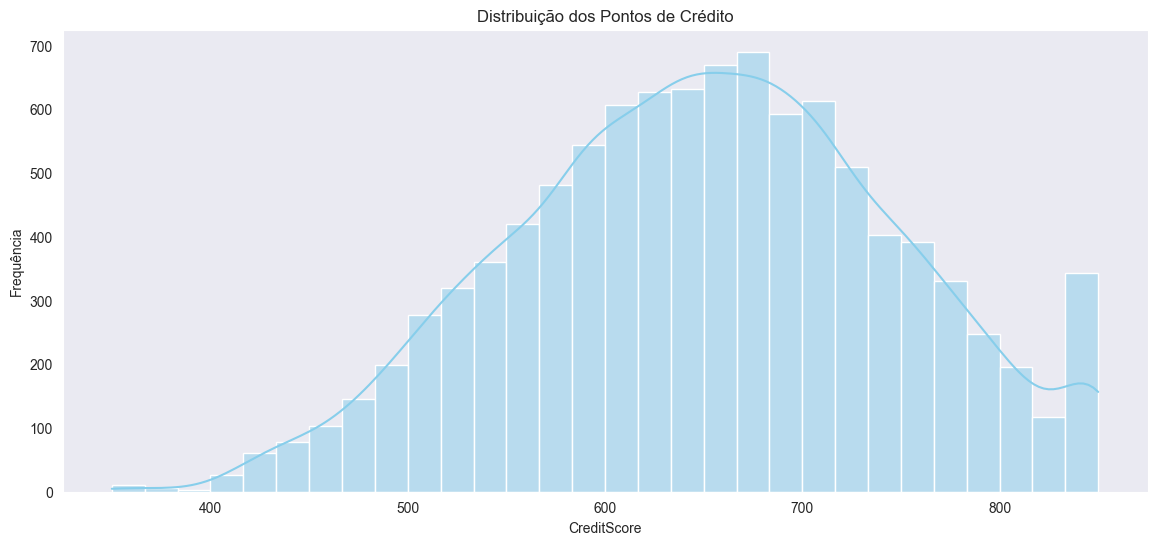

In [80]:

plt.figure(figsize=(14,6))
sns.histplot(df['CreditScore'], bins=30, kde=True, color='skyblue')
plt.title('Distribuição dos Pontos de Crédito')
plt.xlabel('CreditScore')
plt.ylabel('Frequência')

plt.show()

Distribuição do Score de Crédito: O histograma da pontuação de crédito (CreditScore) mostrou uma distribuição próxima da normal, com uma leve concentração de clientes com pontuações mais altas.

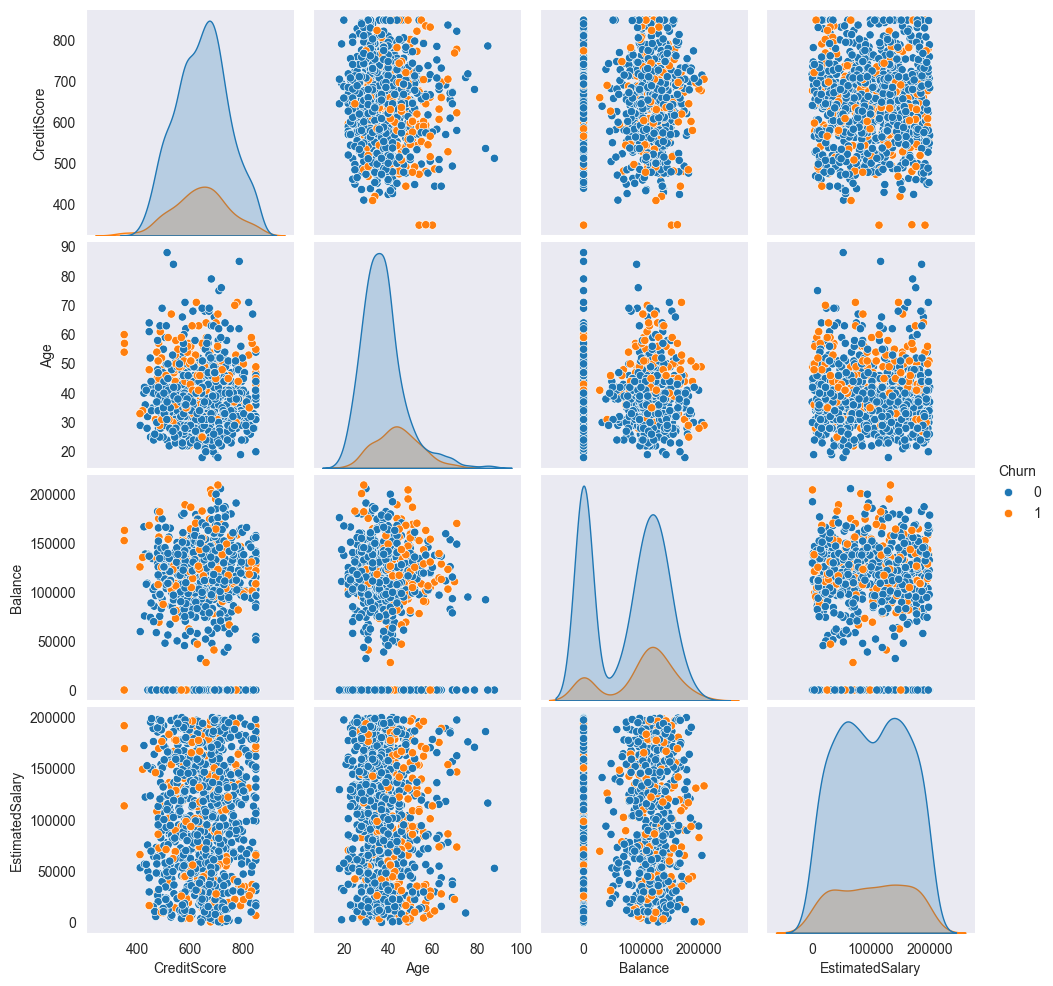

In [81]:

sns.pairplot(df.sample(1000, random_state=RANDOM_STATE),
            hue='Churn',
            vars=['CreditScore','Age','Balance','EstimatedSalary'])

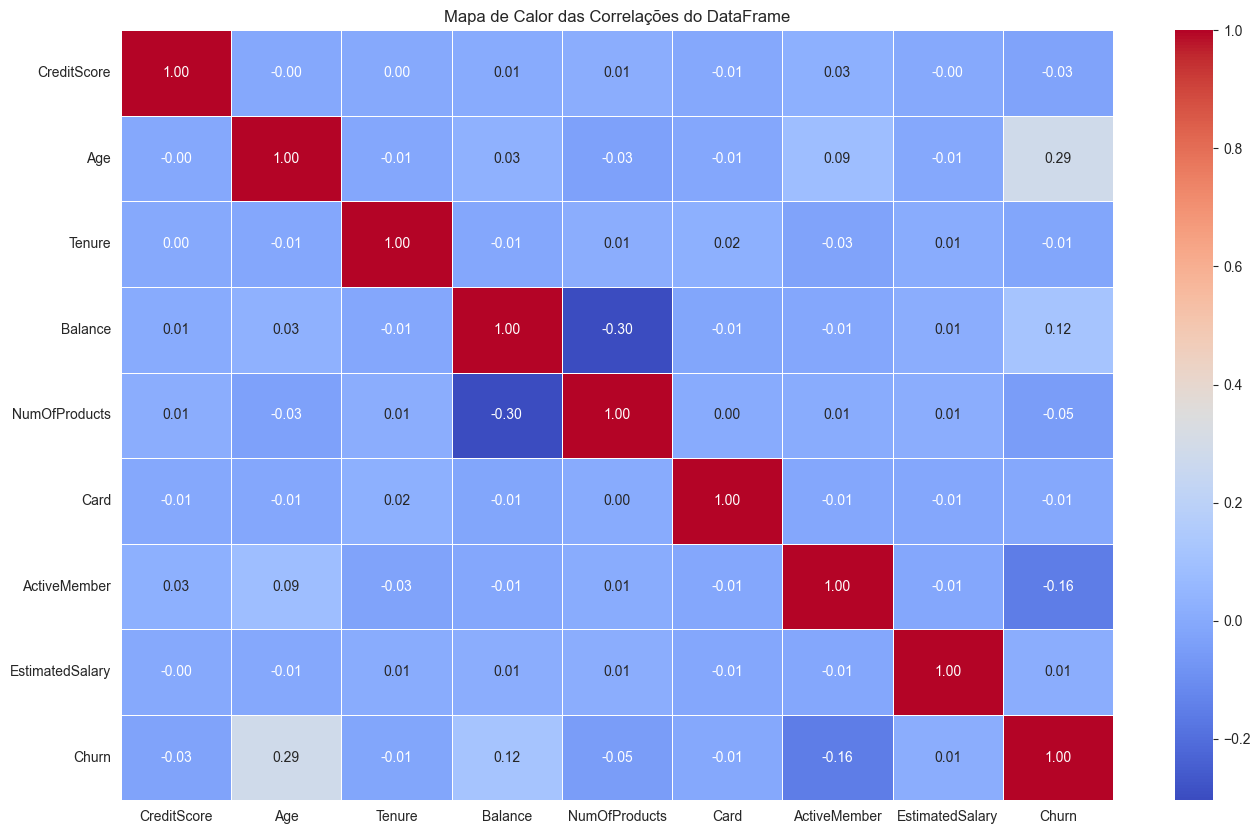

In [82]:
plt.figure(figsize=(16, 10))
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Mapa de Calor das Correlações do DataFrame")
plt.show()

In [83]:

#Melhores e piores correlações a soy_USD:
print("Top correlações:\n", corr.head(10))
print("\nMenor correlações:\n", corr.tail(10))


Top correlações:
                  CreditScore       Age    Tenure   Balance  NumOfProducts  \
CreditScore         1.000000 -0.003965  0.000842  0.006268       0.012238   
Age                -0.003965  1.000000 -0.009997  0.028308      -0.030680   
Tenure              0.000842 -0.009997  1.000000 -0.012254       0.013444   
Balance             0.006268  0.028308 -0.012254  1.000000      -0.304180   
NumOfProducts       0.012238 -0.030680  0.013444 -0.304180       1.000000   
Card               -0.005458 -0.011721  0.022583 -0.014858       0.003183   
ActiveMember        0.025651  0.085472 -0.028362 -0.010084       0.009612   
EstimatedSalary    -0.001384 -0.007201  0.007784  0.012797       0.014204   
Churn              -0.027094  0.285323 -0.014001  0.118533      -0.047820   

                     Card  ActiveMember  EstimatedSalary     Churn  
CreditScore     -0.005458      0.025651        -0.001384 -0.027094  
Age             -0.011721      0.085472        -0.007201  0.285323  
Tenu

### 2.3 Modify


Na etapa de modificação, os dados são preparados e transformados para otimizar o desempenho dos modelos de machine learning. Isso envolve a criação de novas variáveis (feature engineering) e o tratamento de variáveis categóricas.

Criação de Novas Variáveis:
A criação de novas variáveis é uma prática recomendada para extrair mais informações dos dados existentes. Por exemplo, a partir da idade, poderíamos criar faixas etárias, ou a partir do saldo e do salário, poderíamos criar uma variável de "saúde financeira". Essas novas features podem capturar relações mais complexas e melhorar a capacidade preditiva dos modelos. Além disso, as variáveis categóricas, como Geography e Gender, foram transformadas em formato numérico usando a técnica de One-Hot Encoding para que pudessem ser utilizadas pelos algoritmos de classificação.

Criação de novas variáves:

Propostas de Novas Features
1. **Ratio Features**:
   - `SalaryToBalanceRatio`: EstimatedSalary / (Balance + 1) - pode indicar como o salário se relaciona com o saldo
   - `CreditScoreToAgeRatio`: CreditScore / Age - pode mostrar se a pontuação de crédito é adequada para a idade

2. **Interaction Features**:
   - `AgeTenureInteraction`: Age * Tenure - combina tempo como cliente com idade
   - `ProductsActiveInteraction`: NumOfProducts * IsActiveMember - produtos vs atividade

3. **Bin Features**:
   - `AgeGroup`: categorizar idade em grupos (20-30, 30-40, etc.)
   - `CreditScoreGroup`: categorizar score de crédito (Poor, Fair, Good, Excellent)
   - `BalanceGroup`: categorizar saldo em faixas

4. **Aggregate Features** (se tivermos dados históricos):
   - `AvgProductsPerGeography`: Média de produtos por região
   - `ChurnRatePerGeography`: Taxa de churn por região

5. **Derived Features**:
   - `WealthIndicator`: Balance + EstimatedSalary - medida combinada de riqueza
   - `EngagementScore`: (Tenure + NumOfProducts + IsActiveMember) - medida de engajamento

6. **Flag Features**:
   - `HighValueClient`: Flag para clientes com saldo e salário acima da média
   - `LowEngagement`: Flag para clientes inativos com poucos produtos

Pré-processamento Recomendado

1. **Tratamento de Variáveis Categóricas**:
   - Geography: One-Hot Encoding ou Target Encoding
   - Gender: Binary Encoding (0/1)

2. **Normalização/Scale**:
   - CreditScore, Age, Balance, EstimatedSalary podem precisar de scaling

3. **Tratamento de Valores Ausentes** (se houver):
   - Tenure parece ter alguns zeros que podem precisar de tratamento

4. **Feature Selection**:
   - Remover RowNumber (não tem valor preditivo)
   - Avaliar importância de Surname (pode ser removida)



In [84]:

# Coluna target (Alvo):
target_col = 'Churn'


def feature_eng(df):
        # 1. Criar novas features
        df['SalaryToBalanceRatio'] = df['EstimatedSalary'] / (df['Balance'] + 1)
        df['CreditScoreToAgeRatio'] = df['CreditScore'] / df['Age']
        df['AgeTenureInteraction'] = df['Age'] * df['Tenure']
        df['WealthIndicator'] = df['Balance'] + df['EstimatedSalary']

        # 2. Criar faixas etárias
        bins = [0, 30, 40, 50, 60, 100]
        labels = ['<30', '30-40', '40-50', '50-60', '60+']
        df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

        # 3. Criar categorias de crédito
        credit_bins = [0, 580, 670, 740, 800, 850]
        credit_labels = ['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']
        df['CreditScoreGroup'] = pd.cut(df['CreditScore'], bins=credit_bins, labels=credit_labels)

        # 4. Flags
        median_balance = df['Balance'].median()
        median_salary = df['EstimatedSalary'].median()
        df['HighValueClient'] = ((df['Balance'] > median_balance) & 
                                (df['EstimatedSalary'] > median_salary)).astype(int)

        # 5. Codificação binária para Gender

        df['Gender'] = df['Gender'].map({'Female': 1, 'Male': 0})

        return df

data_frame = df.copy()
data = feature_eng(data_frame.copy())
data.info(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   CreditScore            10000 non-null  int64   
 1   Geography              10000 non-null  object  
 2   Gender                 10000 non-null  int64   
 3   Age                    10000 non-null  int64   
 4   Tenure                 10000 non-null  int64   
 5   Balance                10000 non-null  float64 
 6   NumOfProducts          10000 non-null  int64   
 7   Card                   10000 non-null  int64   
 8   ActiveMember           10000 non-null  int64   
 9   EstimatedSalary        10000 non-null  float64 
 10  Churn                  10000 non-null  int64   
 11  SalaryToBalanceRatio   10000 non-null  float64 
 12  CreditScoreToAgeRatio  10000 non-null  float64 
 13  AgeTenureInteraction   10000 non-null  int64   
 14  WealthIndicator        10000 non-null  

Separação dos dados em Validação, Treino e Teste:

In [85]:

# Separar validação de 10%:
df_val = data.sample(frac=0.1, random_state=RANDOM_STATE)

# Remove as amostras de validação do conjunto completo
df_rest = data.loc[~df.index.isin(df_val.index)].copy()

# Separar treino/teste 80/20:
df_train, df_test = train_test_split(
    df_rest,
    test_size=0.2,
    random_state=42,
    shuffle=True
)

# Separar as partições já existentes em features (X) e target (y):
X_train, y_train = df_train.drop(columns=[target_col]).copy(), df_train[target_col].copy()
X_test,  y_test  = df_test.drop(columns=[target_col]).copy(),  df_test[target_col].copy()
X_val,   y_val   = df_val.drop(columns=[target_col]).copy(),   df_val[target_col].copy()

# Checando as partições
print("Tamanho total do dataframe:",df.shape)
print("10% dos Dados separados para Validação:", df_val.shape )
print("80% dos Dados restantes separados para Treino:", df_train.shape)
print("20% dos Dados restantes separados para Teste:", df_test.shape)

Tamanho total do dataframe: (10000, 11)
10% dos Dados separados para Validação: (1000, 18)
80% dos Dados restantes separados para Treino: (7200, 18)
20% dos Dados restantes separados para Teste: (1800, 18)


Informações gerais dos dados:

In [86]:

display(X_train.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7200 entries, 7002 to 8071
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   CreditScore            7200 non-null   int64   
 1   Geography              7200 non-null   object  
 2   Gender                 7200 non-null   int64   
 3   Age                    7200 non-null   int64   
 4   Tenure                 7200 non-null   int64   
 5   Balance                7200 non-null   float64 
 6   NumOfProducts          7200 non-null   int64   
 7   Card                   7200 non-null   int64   
 8   ActiveMember           7200 non-null   int64   
 9   EstimatedSalary        7200 non-null   float64 
 10  SalaryToBalanceRatio   7200 non-null   float64 
 11  CreditScoreToAgeRatio  7200 non-null   float64 
 12  AgeTenureInteraction   7200 non-null   int64   
 13  WealthIndicator        7200 non-null   float64 
 14  AgeGroup               7200 non-null   cat

None

In [87]:

data.isnull().sum()

CreditScore              0
Geography                0
Gender                   0
Age                      0
Tenure                   0
Balance                  0
NumOfProducts            0
Card                     0
ActiveMember             0
EstimatedSalary          0
Churn                    0
SalaryToBalanceRatio     0
CreditScoreToAgeRatio    0
AgeTenureInteraction     0
WealthIndicator          0
AgeGroup                 0
CreditScoreGroup         0
HighValueClient          0
dtype: int64

Descrição dos dados:

In [88]:

display(data.describe().T)

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.000000,584.000000,652.000000,718.000000,850.000000
Gender,10000.0,0.454300,0.497932,0.000000,0.000000,0.000000,1.000000,1.000000
Age,10000.0,38.921800,10.487806,18.000000,32.000000,37.000000,44.000000,92.000000
Tenure,10000.0,5.012800,2.892174,0.000000,3.000000,5.000000,7.000000,10.000000
Balance,10000.0,76485.889288,62397.405202,0.000000,0.000000,97198.540000,127644.240000,250898.090000
NumOfProducts,10000.0,1.530200,0.581654,1.000000,1.000000,1.000000,2.000000,4.000000
Card,10000.0,0.705500,0.455840,0.000000,0.000000,1.000000,1.000000,1.000000
ActiveMember,10000.0,0.515100,0.499797,0.000000,0.000000,1.000000,1.000000,1.000000
EstimatedSalary,10000.0,100090.239881,57510.492818,11.580000,51002.110000,100193.915000,149388.247500,199992.480000
Churn,10000.0,0.203700,0.402769,0.000000,0.000000,0.000000,0.000000,1.000000


### 2.4 Model


Nesta fase, foram treinados e avaliados diversos modelos de classificação para prever o churn dos clientes. A escolha dos modelos foi baseada na natureza do problema, que é de classificação binária (o cliente sai ou não sai).

Resumo dos Treinos Escolhidos:
Foram selecionados os seguintes algoritmos de classificação, conhecidos por sua eficácia em problemas semelhantes:

a) **Regressão Logística (LogisticRegression)**: É um modelo estatístico linear usado para classificação binária. É conhecido por sua simplicidade, rapidez e interpretabilidade. O parâmetro class_weight='balanced' é usado para ajustar automaticamente os pesos das classes de forma inversamente proporcional às suas frequências, o que é útil para lidar com dados desbalanceados.

b) **Random Forest (RandForest)**: É um modelo de ensemble que constrói múltiplas árvores de decisão durante o treinamento e combina suas predições (pela moda) para obter um resultado mais preciso e estável. É robusto a overfitting e, assim como a Regressão Logística, o class_weight='balanced' ajuda a dar mais importância à classe minoritária.

c) **K-Nearest Neighbors (KNN)**: É um algoritmo não paramétrico e baseado em instância. Ele classifica um novo ponto de dados com base na classe majoritária de seus 'k' vizinhos mais próximos no espaço de features. É um modelo simples de entender, mas pode ser computacionalmente caro com grandes volumes de dados.

d) **Gradient Boosting (GradBoost)**: É um método de ensemble que constrói modelos (geralmente árvores) de forma sequencial. Cada novo modelo é treinado para corrigir os erros do modelo anterior, resultando em um modelo final poderoso e preciso.

e) **HistGradientBoosting (HistGB)**: É uma implementação mais rápida e eficiente do Gradient Boosting, otimizada para grandes conjuntos de dados. Ele utiliza histogramas para agrupar as features, o que acelera significativamente o processo de encontrar os melhores pontos de divisão nas árvores.

f) **XGBoost**: É outra implementação de Gradient Boosting extremamente popular e eficiente, conhecida por seu alto desempenho, velocidade e regularização (que ajuda a prevenir o overfitting). Os parâmetros foram ajustados para otimizar o desempenho do modelo no problema específico de churn.

g) **LightGBM (LGBM)**: É mais uma implementação de Gradient Boosting, conhecida por ser ainda mais rápida que o XGBoost em muitos cenários. Utiliza uma abordagem de crescimento de árvore "folha a folha" (leaf-wise), que pode levar a melhores resultados, mas também pode ser mais propensa a overfitting se não for bem ajustada.


Esses modelos são ideais para dados de classificação porque são capazes de aprender fronteiras de decisão complexas entre as classes.

Métricas de Avaliação:
Para avaliar o desempenho dos modelos, as seguintes métricas foram utilizadas:

a) F**1-Score**: É a média harmônica entre a Precisão e o Recall. É uma métrica excelente para datasets desbalanceados, pois busca um equilíbrio entre o número de falsos positivos e falsos negativos. Um F1-Score alto indica que o modelo tem boa precisão e bom recall.

b) **ROC AUC (Area Under the Receiver Operating Characteristic Curve)**: Mede a capacidade do modelo de distinguir entre as classes positiva e negativa. A curva ROC plota a taxa de verdadeiros positivos (Recall) contra a taxa de falsos positivos em vários limiares de classificação. Uma pontuação de 1.0 representa um modelo perfeito, enquanto 0.5 representa um modelo que não tem capacidade de discriminação (semelhante a um palpite aleatório).

c) **Precision (Precisão)**: De todas as vezes que o modelo previu "sim" (churn), quantas estavam corretas? É uma métrica importante quando o custo de um falso positivo é alto.

d) **Recall (Sensibilidade)**: De todos os clientes que realmente deram churn, quantos o modelo conseguiu identificar corretamente? É uma métrica crucial quando o custo de um falso negativo é alto (neste caso, não identificar um cliente que vai sair).

e) **Accuracy (Acurácia)**: É a porcentagem de previsões corretas (tanto positivas quanto negativas) em relação ao total de previsões. Embora seja uma métrica intuitiva, pode ser enganosa em conjuntos de dados desbalanceados, pois um modelo pode atingir alta acurácia simplesmente prevendo a classe majoritária na maioria das vezes.


In [89]:

import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

# Métricas de avaliação
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [90]:

# Identificar colunas numéricas e categóricas no dataframe modificado
numeric_features = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

# Criar o transformador de colunas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical_features)
    ],
    remainder='passthrough'
)

# Modelos a serem utilizados:
MODELS = {
    "a) Regressão Logística": LogisticRegression(max_iter=1000, class_weight='balanced', random_state=RANDOM_STATE),
    'b) RandForest': RandomForestClassifier(n_estimators=500, class_weight='balanced', random_state=RANDOM_STATE),
    "c) KNN": KNeighborsClassifier(),
    'd) GradBoost': GradientBoostingClassifier(random_state=RANDOM_STATE),
    'e) HistGB': HistGradientBoostingClassifier(random_state=RANDOM_STATE),
    'f) XGBoost': XGBClassifier(n_estimators=600, learning_rate=0.05, max_depth=5,
                            subsample=0.8, colsample_bytree=0.8,
                            objective='binary:logistic', eval_metric='logloss',
                            random_state=RANDOM_STATE),
    'g)LightGBM': lgb.LGBMClassifier(random_state=42)
}

# Resultados
SCORING = ['accuracy', 'roc_auc', 'f1', 'precision', 'recall']
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# Dicionário para armazenar os resultados do teste
results_summary, val_summary = {}, {}
# Dicionário para armazenar os resultados da avaliação
results_val_summary= {}

#Função para o treinamento 
## Loop para treinar e avaliar cada modelo
for name, model in MODELS.items():
    print(f"--- Treinando o modelo: {name} ---")

    ## Criar a pipeline completa (pré-processador + modelo)
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])

    ## Medir o tempo de treinamento
    start_time = time.time() 
    model_pipeline.fit(X_train, y_train) # Dados que irão serem usados para treino.
    end_time = time.time()
    training_time = end_time - start_time # Contador e tempo de treino.

    # Conjunto dos dados de Testes:
    ## Fazer predições no conjunto de teste
    y_pred = model_pipeline.predict(X_test)
    y_pred_proba = model_pipeline.predict_proba(X_test)[:, 1]
    ## Armazenando os resultados de avaliação dos dados de Teste:
    results_summary[name] = {
        'F1-Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_pred_proba),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'Accuracy': accuracy_score(y_test, y_pred)
    }
    ## Calcular as métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Conjunto dos dados de Testes:
    ## Fazer predições no conjunto de teste
    y_val_pred = model_pipeline.predict(X_val)
    y_val_pred_proba = model_pipeline.predict_proba(X_val)[:, 1]

    ## Armazenando os resultados de avaliação dos dados de Teste:
    results_val_summary[name] = {
        'F1-Score': f1_score(y_val, y_val_pred),
        'ROC AUC': roc_auc_score(y_val, y_val_pred_proba),
        'Precision': precision_score(y_val, y_val_pred),
        'Recall': recall_score(y_val, y_val_pred),
        'Accuracy': accuracy_score(y_val, y_val_pred)
    }
    ## Calcular as métricas
    f1 = f1_score(y_val, y_val_pred)
    accuracy = accuracy_score(y_val, y_val_pred)
    precision = precision_score(y_val, y_val_pred)
    recall = recall_score(y_val, y_val_pred)
    roc_auc = roc_auc_score(y_val, y_val_pred_proba)

    #print(f"Resultados para {name}:")
    #print(classification_report(y_test, y_pred))
    #print(f"ROC AUC Score: {roc_auc:.4f}")
    print(f"Tempo de Treino: {training_time:.2f} segundos\n")



--- Treinando o modelo: a) Regressão Logística ---
Tempo de Treino: 0.05 segundos

--- Treinando o modelo: b) RandForest ---
Tempo de Treino: 8.34 segundos

--- Treinando o modelo: c) KNN ---
Tempo de Treino: 0.03 segundos

--- Treinando o modelo: d) GradBoost ---
Tempo de Treino: 2.88 segundos

--- Treinando o modelo: e) HistGB ---
Tempo de Treino: 0.37 segundos

--- Treinando o modelo: f) XGBoost ---
Tempo de Treino: 0.47 segundos

--- Treinando o modelo: g)LightGBM ---
[LightGBM] [Info] Number of positive: 1479, number of negative: 5721
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000369 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1898
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205417 -> initscore=-1.352777
[LightGBM] [Info] Start training from score -1.352777
Tempo de Treino: 0.09 segundos



d:\Programas\Python e Visual Basics\Anaconda.Python\envs\Ambiente\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
d:\Programas\Python e Visual Basics\Anaconda.Python\envs\Ambiente\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
d:\Programas\Python e Visual Basics\Anaconda.Python\envs\Ambiente\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
d:\Programas\Python e Visual Basics\Anaconda.Python\envs\Ambiente\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


### 2.5 Assess


A fase de avaliação é crucial para comparar os modelos e selecionar o de melhor desempenho.



In [91]:

# Convertendo o dicionário de resultados dos dados de Teste para um DataFrame:
results_df = pd.DataFrame(results_summary).T

# Exibir a tabela
print("--- Tabela Comparativa de Resultados no Conjunto de Teste ---")
print(results_df)

--- Tabela Comparativa de Resultados no Conjunto de Teste ---
                        F1-Score   ROC AUC  Precision    Recall  Accuracy
a) Regressão Logística  0.505010  0.782501   0.399366  0.686649  0.725556
b) RandForest           0.562390  0.853341   0.792079  0.435967  0.861667
c) KNN                  0.467487  0.759687   0.658416  0.362398  0.831667
d) GradBoost            0.600671  0.865462   0.781659  0.487738  0.867778
e) HistGB               0.612179  0.845419   0.743191  0.520436  0.865556
f) XGBoost              0.589951  0.850747   0.728000  0.495913  0.859444
g)LightGBM              0.610063  0.849450   0.721190  0.528610  0.862222


[LightGBM] [Info] Number of positive: 1479, number of negative: 5721
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000336 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1898
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205417 -> initscore=-1.352777
[LightGBM] [Info] Start training from score -1.352777


d:\Programas\Python e Visual Basics\Anaconda.Python\envs\Ambiente\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


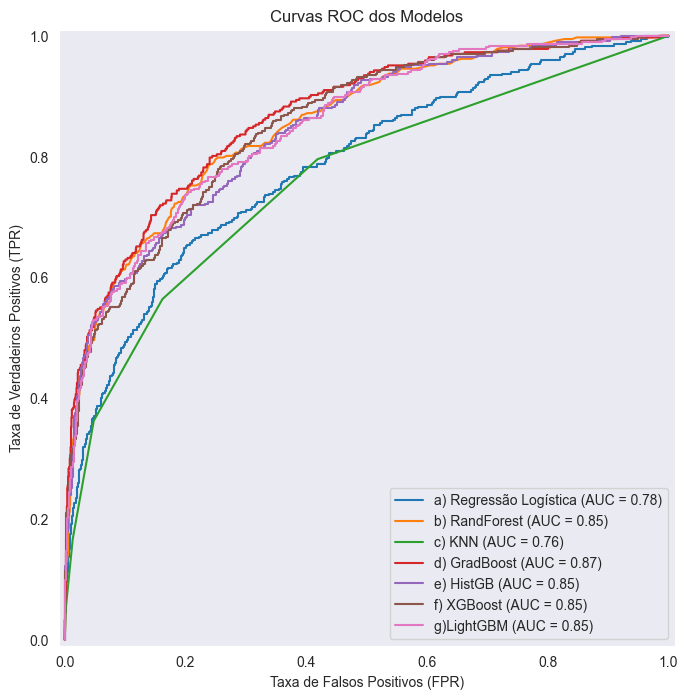

In [92]:


#Curvas ROC dos Modelos (Teste)
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10, 8))
for name, model in MODELS.items():
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    model_pipeline.fit(X_train, y_train)
    y_score = model_pipeline.predict_proba(X_test)[:, 1]
    RocCurveDisplay.from_predictions(
        y_test, y_score, name=name, ax=plt.gca()
    )

plt.title('Curvas ROC dos Modelos')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend()
plt.show()

In [93]:
    
# Convertendo o dicionário de resultados dos dados de Teste para um DataFrame:
results_val_df = pd.DataFrame(results_val_summary).T

# Exibir a tabela
print("--- Tabela Comparativa de Resultados no Conjunto de Validação ---")
print(results_val_df)

--- Tabela Comparativa de Resultados no Conjunto de Validação ---
                        F1-Score   ROC AUC  Precision    Recall  Accuracy
a) Regressão Logística  0.487273  0.785573   0.373259  0.701571     0.718
b) RandForest           0.520000  0.846980   0.715596  0.408377     0.856
c) KNN                  0.454237  0.759230   0.644231  0.350785     0.839
d) GradBoost            0.574194  0.856312   0.747899  0.465969     0.868
e) HistGB               0.555556  0.858037   0.676692  0.471204     0.856
f) XGBoost              0.583587  0.851649   0.695652  0.502618     0.863
g)LightGBM              0.561728  0.851591   0.684211  0.476440     0.858


[LightGBM] [Info] Number of positive: 1479, number of negative: 5721
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000364 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1898
[LightGBM] [Info] Number of data points in the train set: 7200, number of used features: 24
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205417 -> initscore=-1.352777
[LightGBM] [Info] Start training from score -1.352777


d:\Programas\Python e Visual Basics\Anaconda.Python\envs\Ambiente\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


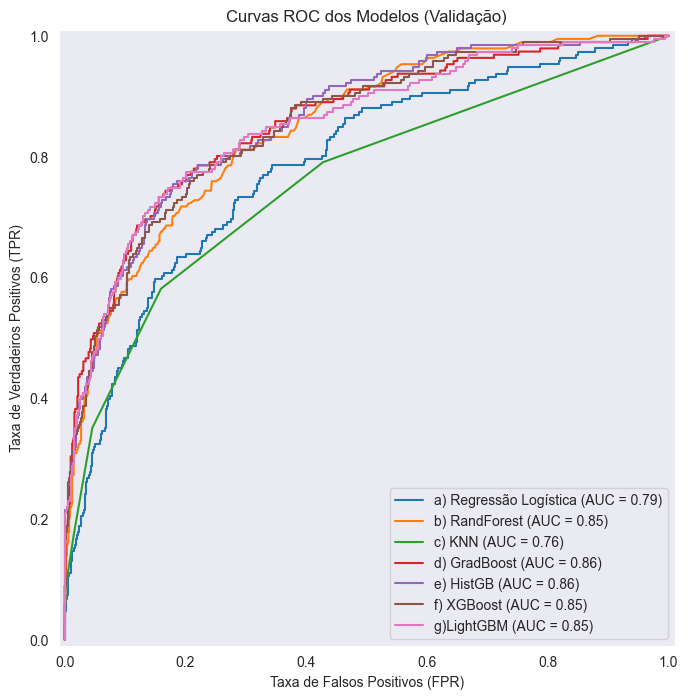

In [94]:

#Curvas ROC dos Modelos (Validação)
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(10, 8))
for name, model in MODELS.items():
    model_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', model)
    ])
    model_pipeline.fit(X_train, y_train)
    y_score = model_pipeline.predict_proba(X_val)[:, 1]
    RocCurveDisplay.from_predictions(
        y_val, y_score, name=name, ax=plt.gca()
    )

plt.title('Curvas ROC dos Modelos (Validação)')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend()
plt.show()


In [95]:

# DataFrame para escolha do melhor modelo em razão de F1-Score e ROC AUC:
df_ratio = results_val_df[['F1-Score', 'ROC AUC']].copy()
#df_ratio['F1/ROC_AUC'] = df_ratio['F1-Score'] / df_ratio['ROC AUC']
df_ratio['F1/ROC_AUC'] = df_ratio['ROC AUC']
df_ratio = df_ratio[['F1/ROC_AUC']]  # Mantém apenas a coluna da razão

df_ratio.reset_index(inplace=True)
df_ratio.rename(columns={'index': 'Modelo'}, inplace=True)
df_ratio


# Ordenar os modelos pelo maior ratio F1/ROC_AUC em df_ratio
best_model_name = df_ratio.loc[df_ratio['F1/ROC_AUC'].idxmax(), 'Modelo']
best_model  = ( MODELS[best_model_name])
best_model

HistGradientBoostingClassifier(random_state=42)

Após a validação cruzada, o modelo que apresentar o melhor F1-Score e a maior área sob a curva ROC (AUC), indicando ser o mais equilibrado e com o maior poder preditivo entre os modelos testados. 

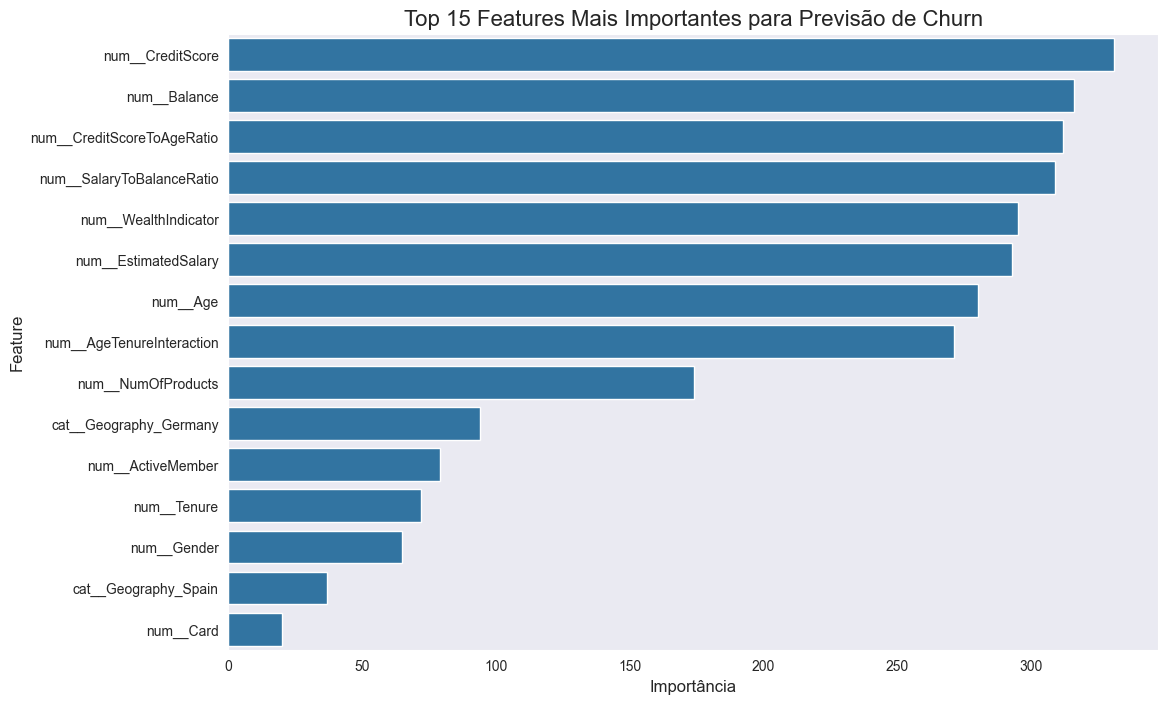

In [96]:

## Criar a pipeline completa (pré-processador + modelo)
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Código para extrair e plotar a importância das features
# Obter as features transformadas pelo preprocessor
transformed_features = list(model_pipeline.named_steps['preprocessor'].get_feature_names_out())
# Obter as importâncias do modelo treinado
importances = model_pipeline.named_steps['classifier'].feature_importances_
# Criar um DataFrame para visualização
feature_importance_df = pd.DataFrame({'Feature': transformed_features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(15)
# Plotar
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Top 15 Features Mais Importantes para Previsão de Churn', fontsize=16)
plt.xlabel('Importância', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()

Salvado o melhor modelo:

O modelo com o melhor desempenho , juntamente com o pipeline de pré-processamento, foi salvo em um arquivo .pkl. Isso permite que o modelo treinado seja facilmente carregado e utilizado para fazer previsões em novos dados sem a necessidade de retreinamento, garantindo consistência e agilidade na aplicação prática. 

In [97]:

import pandas as pd
import joblib # Biblioteca para salvar e carregar modelos
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import HistGradientBoostingClassifier

# --- Suponha que você tenha todos os seus dados e funções de preparação ---
# 1. Juntar todos os dados de treino para o modelo final
X_train_full = pd.concat([X_train, X_test], axis=0)
y_train_full = pd.concat([y_train, y_test], axis=0)
# 2. Aplicar a engenharia de features
X_train_full_mod = feature_eng(X_train_full)

#Criar a pipeline final com o melhor modelo
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', best_model)
])

#Treinar a pipeline com todos os dados
final_pipeline.fit(X_train_full_mod, y_train_full)
# SALVAR A PIPELINE TREINADA
joblib.dump(final_pipeline, 'model_final_churn.joblib')

print("Pipeline final treinada e salva com sucesso como 'model_final_churn.joblib'")


d:\Programas\Python e Visual Basics\Anaconda.Python\envs\Ambiente\Lib\site-packages\sklearn\utils\extmath.py:1101: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
d:\Programas\Python e Visual Basics\Anaconda.Python\envs\Ambiente\Lib\site-packages\sklearn\utils\extmath.py:1106: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
d:\Programas\Python e Visual Basics\Anaconda.Python\envs\Ambiente\Lib\site-packages\sklearn\utils\extmath.py:1126: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


Pipeline final treinada e salva com sucesso como 'model_final_churn.joblib'


## 3. Aplicação Prática do modelo 

In [98]:

# Carregue o arquivo que você salvou anteriormente.
loaded_pipeline = joblib.load('model_final_churn.joblib')
print("Modelo carregado com sucesso!")

Modelo carregado com sucesso!


In [99]:

# Criação de um dataframe aleatório para fim de aplicação do modelo:

#%pip install faker
from faker import Faker

# Configuração
fake = Faker()
np.random.seed(42)
num_rows = 100

# Gerar dados sintéticos mantendo as distribuições originais
data = {
    'RowNumber': range(10001, 10001 + num_rows),
    'CustomerId': [fake.unique.random_number(digits=8) for _ in range(num_rows)],
    'Surname': [fake.last_name() for _ in range(num_rows)],
    'CreditScore': np.random.randint(300, 850, num_rows),
    'Geography': np.random.choice(['France', 'Germany', 'Spain'], num_rows, p=[0.5, 0.25, 0.25]),
    'Gender': np.random.choice(['Male', 'Female'], num_rows, p=[0.55, 0.45]),
    'Age': np.random.randint(18, 80, num_rows),
    'Tenure': np.random.randint(0, 10, num_rows),
    'Balance': np.round(np.random.uniform(0, 250000, num_rows), 2),
    'NumOfProducts': np.random.choice([1, 2, 3, 4], num_rows, p=[0.5, 0.35, 0.1, 0.05]),
    'HasCrCard': np.random.choice([0, 1], num_rows, p=[0.3, 0.7]),
    'IsActiveMember': np.random.choice([0, 1], num_rows, p=[0.45, 0.55]),
    'EstimatedSalary': np.round(np.random.uniform(10000, 200000, num_rows), 2),
    'Exited': np.random.choice([0, 1], num_rows, p=[0.8, 0.2])
}
def ajustar_probabilidades(data, num_rows):
    # Ajustar algumas relações para manter padrões realistas
    for i in range(num_rows):
        # Clientes mais velhos tendem a ter maior pontuação de crédito
        if data['Age'][i] > 50:
            data['CreditScore'][i] = min(850, data['CreditScore'][i] + np.random.randint(20, 50))
        
        # Clientes na Alemanha têm maior probabilidade de sair
        if data['Geography'][i] == 'Germany':
            data['Exited'][i] = np.random.choice([0, 1], p=[0.7, 0.3])
        
        # Clientes com saldo zero têm menor probabilidade de ter cartão
        if data['Balance'][i] < 1000:
            data['HasCrCard'][i] = np.random.choice([0, 1], p=[0.7, 0.3])
        
        # Mulheres têm maior probabilidade de sair
        if data['Gender'][i] == 'Female':
            data['Exited'][i] = np.random.choice([0, 1], p=[0.75, 0.25])
        
        # Salvar em arquivo CSV
        test_df.to_csv('Churn_Modelling_Test.csv', index=False)
    return data

# Criar DataFrame
test_df = pd.DataFrame(data)
print("Arquivo de teste gerado com sucesso com 100 linhas.")

#Criando o dataframe com novos dados:
new_clients = pd.read_csv('Churn_Modelling_Test.csv')
# Excluindo as colunas desnecesessárias:
new_clients = new_clients.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
# Renomeado colunas:
new_clients = new_clients.rename(columns = {
                            "IsActiveMember" : "ActiveMember",
                            "HasCrCard" : "Card",
                            "Exited" : "Churn",
})
# Aplicando a função feature_eng:
df_new_clients = feature_eng(new_clients)
df_new_clients.head(14)


Arquivo de teste gerado com sucesso com 100 linhas.


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,Card,ActiveMember,EstimatedSalary,Churn,SalaryToBalanceRatio,CreditScoreToAgeRatio,AgeTenureInteraction,WealthIndicator,AgeGroup,CreditScoreGroup,HighValueClient
0,402,France,0,75,6,150610.23,2,0,1,125499.93,0,0.833271,5.360000,450,276110.16,60+,Poor,1
1,735,France,0,75,3,138425.76,1,1,0,82068.08,1,0.592863,9.800000,225,220493.84,60+,Good,0
2,570,Germany,1,39,0,53181.97,4,0,1,151407.43,0,2.846916,14.615385,0,204589.40,30-40,Poor,0
3,406,Spain,1,66,4,236548.64,1,1,1,49060.16,0,0.207399,6.151515,264,285608.80,60+,Poor,0
4,371,Germany,1,69,6,195324.01,2,1,0,159680.08,0,0.817510,5.376812,414,355004.09,60+,Poor,1
5,320,Spain,0,59,9,28366.15,1,1,0,124707.09,1,4.396180,5.423729,531,153073.24,50-60,Poor,0
6,421,France,0,23,9,232732.28,2,1,1,31710.79,0,0.136254,18.304348,207,264443.07,<30,Poor,0
7,766,Germany,1,32,5,243562.05,2,0,1,88755.87,0,0.364406,23.937500,160,332317.92,30-40,Very Good,0
8,514,France,1,71,4,248982.81,1,1,0,174068.45,0,0.699116,7.239437,284,423051.26,60+,Poor,1
9,630,France,1,60,3,13967.79,1,1,1,185362.44,0,13.269756,10.500000,180,199330.23,50-60,Fair,0


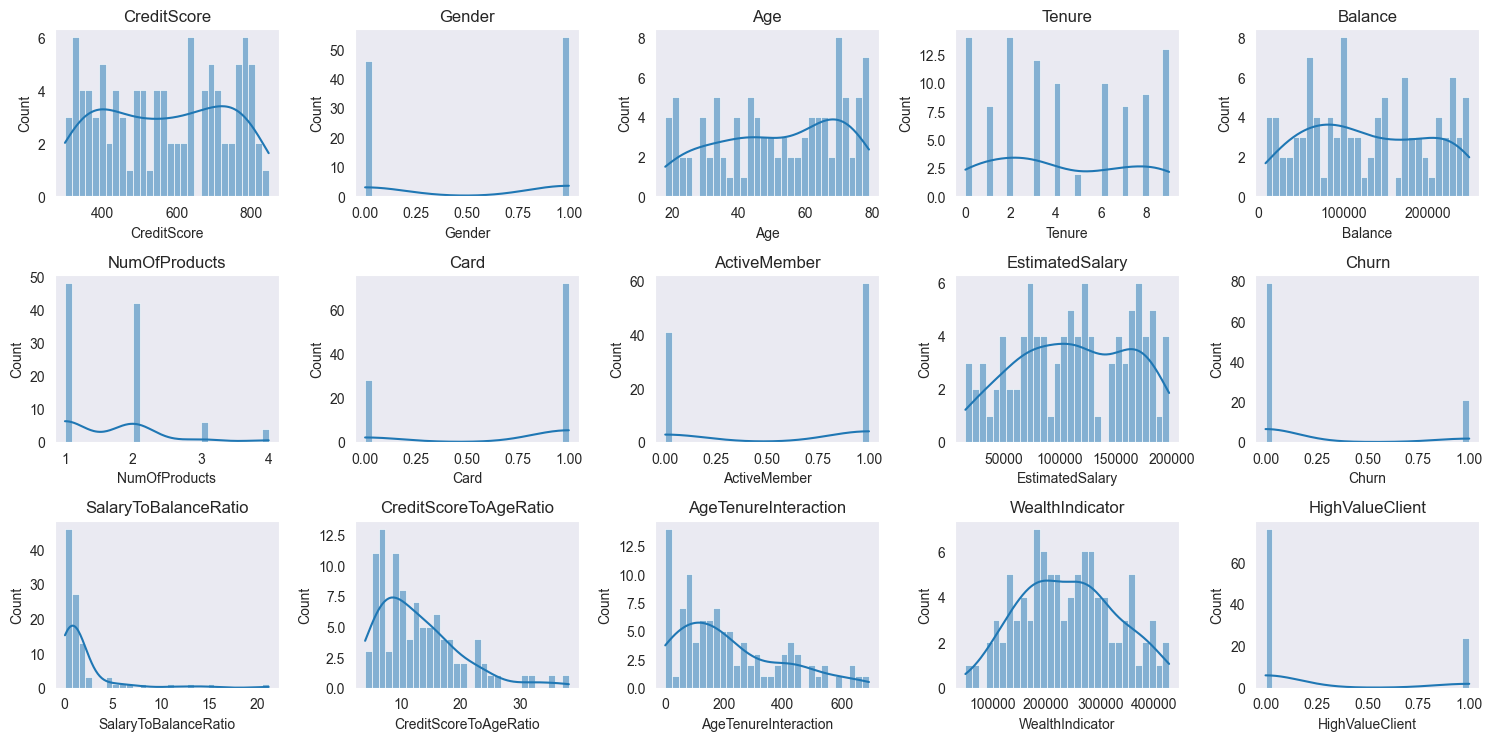

In [100]:

num_cols = df_new_clients.select_dtypes(include='number').columns

plt.figure(figsize=(15, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(5, 5, i)
    sns.histplot(df_new_clients[col].dropna(), kde=True, bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()




Aplicando o melhor modelo e resultados:

In [101]:


df_new = df_new_clients.copy()
# Fazer a predição da classe (0 para Fica, 1 para Sai)
predicoes = loaded_pipeline.predict(df_new)

# Fazer a predição da probabilidade de churn
# predict_proba retorna uma probabilidade para cada classe: [P(classe 0), P(classe 1)]
probabilidades = loaded_pipeline.predict_proba(df_new)
probabilidade_de_churn = probabilidades[:, 1] # Pegamos apenas a probabilidade da classe 1 (Churn)


# --- 4. INTERPRETAR E USAR OS RESULTADOS ---
# Adicione as previsões de volta ao dataframe original para análise.
df_new['Predicao_Churn'] = predicoes
df_new['Probabilidade_Churn'] = probabilidade_de_churn
# Selecionar apenas as colunas index, Predicao_Churn e Probabilidade_Churn
df_result = df_new.reset_index()[[ 'Predicao_Churn', 'Probabilidade_Churn']]
display(df_result.head(15))


,Predicao_Churn,Probabilidade_Churn
0,0,0.050416
1,0,0.304652
2,1,0.965945
3,0,0.391063
4,1,0.632065
5,1,0.945659
6,0,0.065489
7,0,0.076555
8,1,0.938327
9,0,0.496742


C:\Users\Rubens Molina\AppData\Local\Temp\ipykernel_50528\2593761408.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Predicao_Churn', data=df_new, palette='Set2')


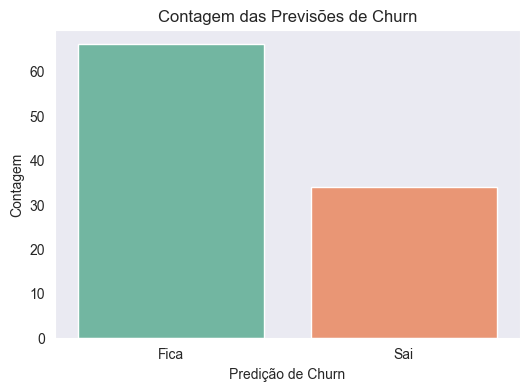

In [102]:

# Análise gráfica das colunas Predicao_Churn e Probabilidade_Churn
import seaborn as sns
import matplotlib.pyplot as plt

# Contagem das previsões de churn (0 = Fica, 1 = Sai)
plt.figure(figsize=(6, 4))
sns.countplot(x='Predicao_Churn', data=df_new, palette='Set2')
plt.title('Contagem das Previsões de Churn')
plt.xlabel('Predição de Churn')
plt.ylabel('Contagem')
plt.xticks([0, 1], ['Fica', 'Sai'])
plt.show()


C:\Users\Rubens Molina\AppData\Local\Temp\ipykernel_50528\1394792072.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Predicao_Churn', y='Probabilidade_Churn', data=df_new, palette='Set2')


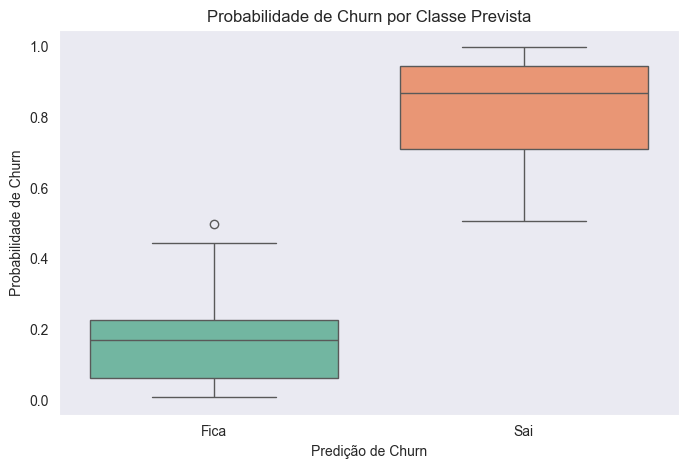

In [103]:


# Boxplot das probabilidades por predição
plt.figure(figsize=(8, 5))
sns.boxplot(x='Predicao_Churn', y='Probabilidade_Churn', data=df_new, palette='Set2')
plt.title('Probabilidade de Churn por Classe Prevista')
plt.xlabel('Predição de Churn')
plt.ylabel('Probabilidade de Churn')
plt.xticks([0, 1], ['Fica', 'Sai'])
plt.show()